hished experiments
##########
##########
##########


2020-10-12 22:16:15.883759
./pkl/experiments/_regression_gran1h_period1_lags2_model-tcn_user49_imp.pkl
1365/6912 fishished experiments
##########
##########
##########


2020-10-12 22:16:15.885779
./pkl/experiments/_regression_gran1h_period4_lags1_model-tcn_user49_imp.pkl
1366/6912 fishished experiments
##########
##########
##########


2020-10-12 22:16:15.887760
./pkl/experiments/_regression_gran1h_period2_lags1_model-tcn_user49_imp.pkl
1367/6912 fishished experiments
##########
##########
##########


2020-10-12 22:16:15.891793
./pkl/experiments/_regression_gran1h_period1_lags1_model-tcn_user49_imp.pkl
1368/6912 fishished experiments
##########
##########
##########


2020-10-12 22:16:15.893762
./pkl/experiments/_regression_gran30min_period4_lags8_model-tcn_user47_imp.pkl
1369/6912 fishished experiments
##########
##########
##########


2020-10-12 22:16:15.894759
./pkl/experiments/_regression_gran30min_period2_lags8_model-tcn_us

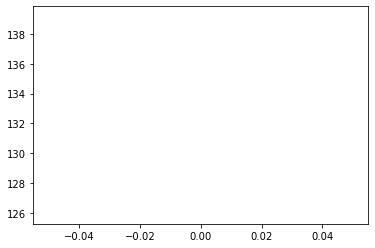

1444/6912 fishished experiments
##########
##########
##########


2020-10-13 00:29:01.828412
./pkl/experiments/_regression_gran30min_period2_lags4_model-tcn_user44_imp.pkl
1445/6912 fishished experiments
##########
##########
##########


2020-10-13 00:29:01.828412
./pkl/experiments/_regression_gran30min_period1_lags4_model-tcn_user44_imp.pkl
1446/6912 fishished experiments
##########
##########
##########


2020-10-13 00:29:01.828412
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-tcn_user44_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period4_lags2_model-tcn_user44_imp.pkl
Starting iteration nb 1 of 5
Shapes for this iteration are: 
X_train: (30361, 2, 36)
X_test: (398, 2, 36)
Score: 0.137
Time: 11.979
Model: "tcn"
________________________________

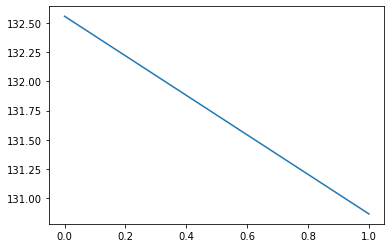

1447/6912 fishished experiments
##########
##########
##########


2020-10-13 02:40:01.201183
./pkl/experiments/_regression_gran30min_period2_lags2_model-tcn_user44_imp.pkl
1448/6912 fishished experiments
##########
##########
##########


2020-10-13 02:40:01.201183
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags2_model-tcn_user44_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period1_lags2_model-tcn_user44_imp.pkl
Starting iteration nb 1 of 5
Shapes for this iteration are: 
X_train: (30962, 2, 36)
X_test: (405, 2, 36)
Score: 0.102
Time: 11.981
Model: "tcn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
residual_block_0 (ResidualBl multiple                  828       
_______

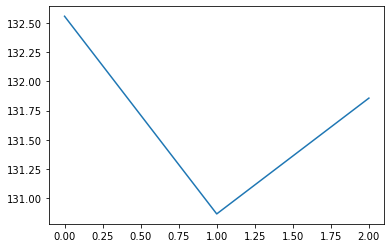

1449/6912 fishished experiments
##########
##########
##########


2020-10-13 04:51:59.553070
./pkl/experiments/_regression_gran30min_period4_lags1_model-tcn_user44_imp.pkl
1450/6912 fishished experiments
##########
##########
##########


2020-10-13 04:51:59.553070
./pkl/experiments/_regression_gran30min_period2_lags1_model-tcn_user44_imp.pkl
1451/6912 fishished experiments
##########
##########
##########


2020-10-13 04:51:59.553070
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-tcn_user44_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period1_lags1_model-tcn_user44_imp.pkl
Starting iteration nb 1 of 5
Shapes for this iteration are: 
X_train: (22589, 1, 36)
X_test: (446, 1, 36)
Score: 0.093
Time: 8.971
Model: "tcn"
_________________________________

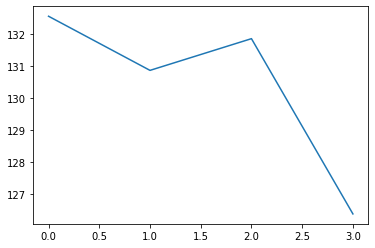

1452/6912 fishished experiments
##########
##########
##########


2020-10-13 06:58:27.233629
./pkl/experiments/_regression_gran1h_period4_lags8_model-tcn_user44_imp.pkl
1453/6912 fishished experiments
##########
##########
##########


2020-10-13 06:58:27.249255
./pkl/experiments/_regression_gran1h_period2_lags8_model-tcn_user44_imp.pkl
1454/6912 fishished experiments
##########
##########
##########


2020-10-13 06:58:27.249255
./pkl/experiments/_regression_gran1h_period1_lags8_model-tcn_user44_imp.pkl
1455/6912 fishished experiments
##########
##########
##########


2020-10-13 06:58:27.249255
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags4_model-tcn_user44_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran1h_period4_lags4_model-tcn_user44_imp.pkl
Starting iteration 

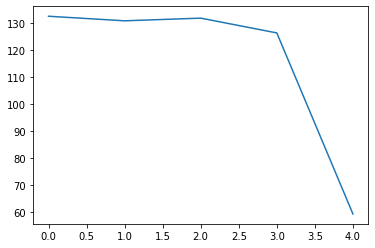

1456/6912 fishished experiments
##########
##########
##########


2020-10-13 07:57:46.555381
./pkl/experiments/_regression_gran1h_period2_lags4_model-tcn_user44_imp.pkl
1457/6912 fishished experiments
##########
##########
##########


2020-10-13 07:57:46.555381
./pkl/experiments/_regression_gran1h_period1_lags4_model-tcn_user44_imp.pkl
1458/6912 fishished experiments
##########
##########
##########


2020-10-13 07:57:46.555381
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags2_model-tcn_user44_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran1h_period4_lags2_model-tcn_user44_imp.pkl
Starting iteration nb 1 of 5
Shapes for this iteration are: 
X_train: (14976, 2, 36)
X_test: (195, 2, 36)
Score: 0.087
Time: 4.367
Model: "tcn"
_____________________________________________

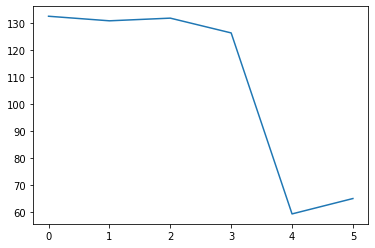

1459/6912 fishished experiments
##########
##########
##########


2020-10-13 09:02:46.828596
./pkl/experiments/_regression_gran1h_period2_lags2_model-tcn_user44_imp.pkl
1460/6912 fishished experiments
##########
##########
##########


2020-10-13 09:02:46.828596
./pkl/experiments/_regression_gran1h_period1_lags2_model-tcn_user44_imp.pkl
1461/6912 fishished experiments
##########
##########
##########


2020-10-13 09:02:46.828596
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags1_model-tcn_user44_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran1h_period4_lags1_model-tcn_user44_imp.pkl
Starting iteration nb 1 of 5


In [1]:
import os
import pickle as pkl
from experiments.experiment_running import run_all_experiments
def fitness():
    pass
run_all_experiments(reverse_order=True, experiment_verbose=2, fit_verbose=0, model_verbose=1)